## ÌîÑÎ°úÏ†ùÌä∏ 01
- Îç∞Ïù¥ÌÑ∞Îäî kaggleÏóê ÎÇòÏò§Îäî LoanDefault Îç∞Ïù¥ÌÑ∞ ÌôúÏö©
  - https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data
  - kaggleÏóêÏÑú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò ÌôïÏù∏ÌñàÏúºÎÇò, Î≥∏ ÏàòÏóÖÏóêÏÑúÎäî Ïù¥ÎØ∏ csvÌååÏùºÏù¥ Ï†úÍ≥µÎê®
- Ïã§Ïäµ ÏãúÏóêÎäî colabÏóê csvÌååÏùº Ïò¨Î†§ÏÑú ÏûëÏóÖÌï®
- Ïó¨Í∏∞ÏÑúÎäî (Ìé∏ÏùòÏÉÅ) EDA Î∂ÄÎ∂ÑÏùÄ jupyterlabÏóêÏÑú interactiveÌïòÍ≤å ÏßÑÌñâÌï®
  - Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎÇò class Ï†ïÏùòÌïòÍ∏∞ ÏúÑÌï¥ Ïª¨ÎüºÎ≥Ñ ÏãúÍ∞ÅÌôî, Í≤∞Ï∏°Ïπò/Ïù¥ÏÉÅÏπò ÌôïÏù∏
- Í∞ïÏÇ¨ÎãòÍªòÏÑú sklearn, torch Îëò Ï§ëÏóê ÌïòÎÇòÎßå Ìï¥ÎèÑ ÎêúÎã§Í≥† ÌïòÏÖîÏÑú, sklearnÏùÑ Ïö∞ÏÑ† Ìï¥Î≥¥Í≥† Ïó¨Ïú†Í∞Ä ÏûàÏúºÎ©¥ torch ÏãúÎèÑ
  - Ïù¥Î≤à Ï£º Ïã§ÏäµÏùÄ EDA/Ï†ÑÏ≤òÎ¶¨/LogisticÏù¥ Î™©Ï†ÅÏù¥ÎØÄÎ°ú, sklearn Ïö∞ÏÑ†ÏãúÌï®



### 01 Library & HyperParameter Defintion

#### 01-01) ÎùºÏù¥Î∏åÎü¨Î¶¨, Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [70]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np # numpy(Ïà´Ïûê Í≥ÑÏÇ∞, ÏàòÌïô) ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd # pandas(Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï≤òÎ¶¨) ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # scaling Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
from sklearn.model_selection import train_test_split # sklearn.model_selectionÏóêÏÑú train_test_split Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨-1
import seaborn as sns # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨-2

# Ïª¨ÎüºÎ™Ö Ï≤òÎ¶¨ Í¥ÄÎ†® ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Ìï®ÏàòÏ†ïÏùò
import re
def clean_feature_names(columns):
    return [re.sub(r"[<>\[\]]", "_", col) for col in columns]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

base_path = '/content/drive/MyDrive/AI_serivce_track/Week_01'

# Ï†ïÌôïÌïú Ïù¥Î¶ÑÏúºÎ°ú Îã§Ïãú Ìï†Îãπ
data_path = os.path.join(base_path, 'Loan_Default.csv')
Loan_Default_df = pd.read_csv(data_path)
Loan_Default_df.shape

(148670, 34)

#### 01-02) hyper-parameter Ï†ïÏùò

In [38]:
# hyper-parameter definition

# Î≥ÄÏàò ÏÑ†ÌÉù Î∞è train/test ÎπÑÏú® Í¥ÄÎ†®
target_var = 'Status' # yÏóê Ìï¥ÎãπÌïòÎäî Î≥ÄÏàò
delete_var = ['ID','year','credit_type_EQUI'] # Î∂àÌïÑÏöîÌïú Î≥ÄÏàò
# credit_type_EQUIÏóê ÏùòÌï¥ ÏôÑÏ†ÑÌûà Î≥ÄÏàòÍ∞Ä Î∂ÑÎ¶¨ÎêòÏñ¥ÏÑú random-forest Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå
test_rate = 0.2 # test Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú®
random_state = 42 # random_state ÏßÄÏ†ï (train_test_splitÏóê ÌôúÏö©)

# Ï†ÑÏ≤òÎ¶¨ Class Í¥ÄÎ†® hyper-parameter
missing_value_rate = 0.01 # 1% Ïù¥ÏÉÅÏù¥Î©¥ Î≤îÏ£º/ÏàòÏπò ÏÉÅÍ¥ÄÏóÜÏù¥ Ìï¥Îãπ Í∞í ÏÇ≠Ï†ú
skewness_abs_criterion = 2 # skewness Ï†àÎåÄÍ∞íÏù¥ 2 ÎÑòÏñ¥Í∞ÄÎ©¥(Í≤∞Ï∏°ÏπòÍ∞Ä missing_value_rate Ïù¥ÏÉÅÏù¥Í≥†), log1pÎ≥ÄÌôò ÌõÑ impute!
scaling_method = 'standard' # ('standard','min_max','robust','None' Ï§ë ÏûÖÎ†•) # NoneÏúºÎ°ú ÏûÖÎ†•ÌïòÎÇò scaling_method ÏßÄÏö∞ÎÇò Í≤∞Í≥ºÎäî Í∞ôÏùå

### 02 EDA + Sampling
- 03ÏóêÏÑú 'Ï†ÑÏ≤òÎ¶¨' classÎÇò Ìï®Ïàò Ï†ïÏùò ÌïòÍ∏∞ ÏúÑÌï¥ EDA ÏàòÌñâ
  - missing valueÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ ÎπÑÏú®(Ïòà: 1%)Ïù¥Î©¥ Î¨¥ÏãúÌïòÍ≥† ÏÇ≠Ï†úÌï†ÏßÄ
  - missing valueÍ∞Ä (1% Ïù¥ÏÉÅÏù¥Í≥†) Î≤îÏ£ºÌòïÏù¥ÎùºÎ©¥?
    - 'Unknown'Ïù¥ÎÇò 'Missing'ÏúºÎ°ú Ï±ÑÏö∞Í≥† ÎÇòÏ§ëÏóê one-hot-encoding
  - missing valueÍ∞Ä (1% Ïù¥ÏÉÅÏù¥Í≥†) ÏàòÏπòÌòïÏù¥ÎùºÎ©¥?
- ÌäπÏù¥Ìïú Ïª¨Îüº 'age'
  - ageÍµ¨Í∞ÑÎ≥ÑÎ°ú status(default Ìï†ÏßÄ ÏïàÌï†ÏßÄ) Í¥ÄÎ†® ÏûàÎäîÏßÄ ÌôïÏù∏ ÌïÑÏöî

In [5]:
Loan_Default_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
Loan_Default_df.head(n=7) # ÏõêÎûò Í∏∞Î≥∏Í∞íÏù¥ n=5 ÏûÑ

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   
5  24895  2019         cf              Joint           pre     type1   
6  24896  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   
5           p1                l1        nopc                  nob/c  ...   
6           p3                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   
5          EXP           864                       EXP  35-44   
6          EXP           860                       EXP  55-64   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  
5                   not_inst  70.089286  North        direct       0  40.0  
6                    to_inst  79.109589  North        direct       0  44.0  

[7 rows x 34 columns]

In [7]:
Loan_Default_df.info() # 148670Ïù¥ Ï†ÑÏ≤¥ ÌÅ¨Í∏∞,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#### 02-01 Î∂àÌïÑÏöîÌïú Î≥ÄÏàò ÏãùÎ≥Ñ
- IDÎäî Î™®Îç∏ ÏòàÏ∏°Ïóê Î∂àÌïÑÏöîÌï®
- year ÌôïÏù∏Ìï¥Î≥¥Îãà 2019ÎÖÑÎßå ÏûàÏùå (ÏÇ≠Ï†ú Í∞ÄÎä•)

In [8]:
# yearÎ≥ÄÏàò ÌôïÏù∏Ìï¥Î≥¥Í∏∞
Loan_Default_df['year'].value_counts()

year
2019    148670
Name: count, dtype: int64

#### 02-02 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï Ï†ïÌï† Î™©Ï†ÅÏùò 'ÏãúÍ∞ÅÌôî'

In [9]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÌôïÏù∏
Loan_Default_df.isnull().mean()

ID                           0.000000
year                         0.000000
loan_limit                   0.022493
Gender                       0.000000
approv_in_adv                0.006107
loan_type                    0.000000
loan_purpose                 0.000901
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.245100
Interest_rate_spread         0.246445
Upfront_charges              0.266644
term                         0.000276
Neg_ammortization            0.000814
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.101554
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.061546
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant_credit_type     0.000000
age                          0.001345
submission_of_application    0.001345
LTV                          0.101554
Region                       0.000000
Security_Type                0.000000
Status                       0.000000
dtir1                        0.162245
dtype: float64

In [10]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú®, Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ Í≤∞Ìï©

null_ratio = Loan_Default_df.isnull().mean() # Í≤∞Ï∏°Ïπò ÎπÑÏú®
dtypes = Loan_Default_df.dtypes

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©
summary = pd.DataFrame({
    'missing_ratio': null_ratio,
    'dtype': dtypes
})

# ÎπÑÏú® ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ (ÏÑ†ÌÉù)
summary = summary.sort_values(by='missing_ratio', ascending=False)

summary.head(10)  # ÏÉÅÏúÑ 10Í∞úÎßå Î≥¥Í∏∞

missing_ratio    dtype
Upfront_charges            0.266644  float64
Interest_rate_spread       0.246445  float64
rate_of_interest           0.245100  float64
dtir1                      0.162245  float64
property_value             0.101554  float64
LTV                        0.101554  float64
income                     0.061546  float64
loan_limit                 0.022493   object
approv_in_adv              0.006107   object
age                        0.001345   object

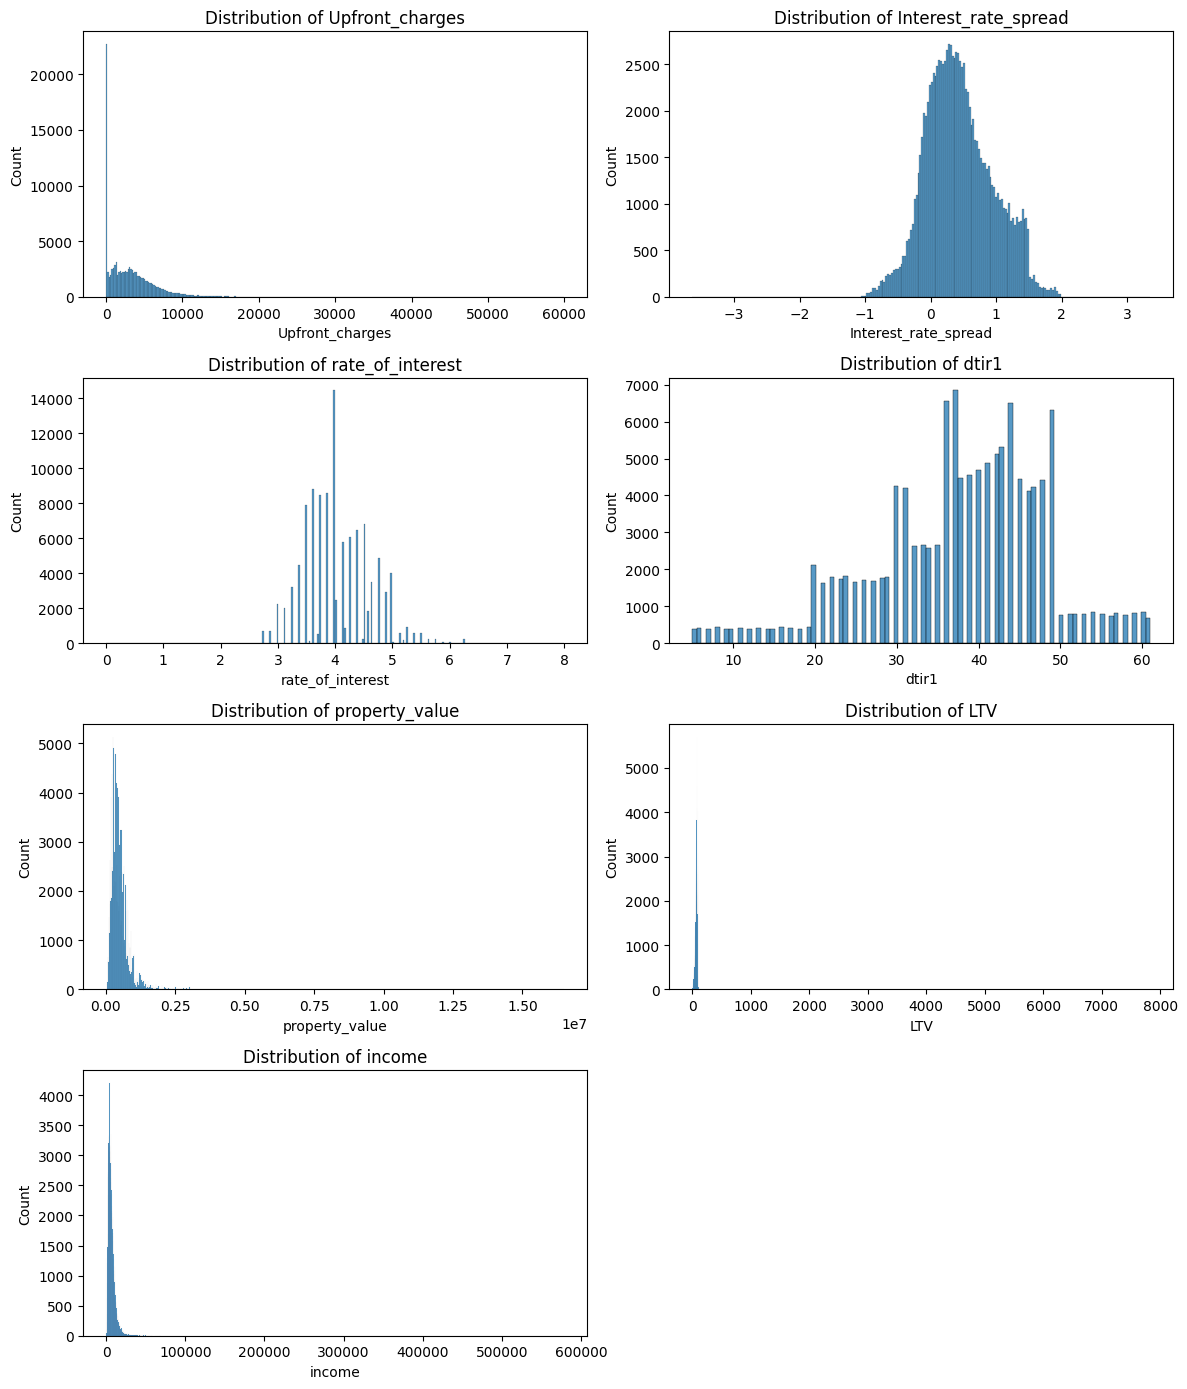

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï/Í≤∞Ï∏°Ïπò ÎßéÏùÄ 7Í∞ú Ï≤¥ÌÅ¨
col_list = ['Upfront_charges','Interest_rate_spread','rate_of_interest','dtir1','property_value','LTV','income']

# subplot ÏÑ§Ï†ï (4Ìñâ 2Ïó¥)
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()  # 2D -> 1D array

# Í∞Å Ïª¨ÎüºÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
for i, col in enumerate(col_list):
    sns.histplot(Loan_Default_df[col], ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {col}")

# Îπà subplot ÏßÄÏö∞Í∏∞ (ÎßàÏßÄÎßâ Ïπ∏)
for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Upfront_charges, property_value, LTV, income -> Ïã¨ÌïòÍ≤å Í∏∞Ïö∏Ïñ¥Ï†∏ ÏûàÏúºÎØÄÎ°ú logÎ≥ÄÌôò(log1p) Ìï¥ÏÑú missing-valueÏ±ÑÏö∞Í∏∞
# Interest_rate_spread, rate_of_interest, dtir1 -> Ï§ëÍ∞ÑÍ∞íÏúºÎ°ú Ï±ÑÏõåÎèÑ Îê† ÎìØ

In [12]:
# (Ï∞∏Í≥†) ÌÅ¥ÎûòÏä§ Ï†ÑÏ≤òÎ¶¨ Î°úÏßÅ ÌôïÎ¶Ω Î™©Ï†ÅÏúºÎ°ú ÏàòÏπòÌòï Ïª¨Îüº skewnessÍ≥ÑÏÇ∞
# ÏàòÏπòÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
num_cols = Loan_Default_df.select_dtypes(include=['float64', 'int64']).columns
# skewness Í≥ÑÏÇ∞
skew_vals = Loan_Default_df[num_cols].skew()

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨ (Ï†àÎåìÍ∞í ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨)
skew_summary = skew_vals.abs().sort_values(ascending=False).to_frame(name='abs_skew')

# ÏõêÎûò skewness Í∞íÎèÑ Í∞ôÏù¥ Î≥¥Í∏∞
skew_summary['skew'] = skew_vals[skew_summary.index]

skew_summary

abs_skew        skew
LTV                   120.615337  120.615337
income                 17.307695   17.307695
property_value          4.586276    4.586276
term                    2.174822   -2.174822
Upfront_charges         1.754076    1.754076
loan_amount             1.666998    1.666998
Status                  1.176762    1.176762
dtir1                   0.551465   -0.551465
rate_of_interest        0.388406    0.388406
Interest_rate_spread    0.280762    0.280762
Credit_Score            0.004767    0.004767
year                    0.000000    0.000000
ID                      0.000000    0.000000

In [13]:
Loan_Default_df['loan_limit'].value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [14]:
Loan_Default_df['submission_of_application'].value_counts() # to_inst, not_inst

submission_of_application
to_inst     95814
not_inst    52656
Name: count, dtype: int64

In [15]:
Loan_Default_df['age'].value_counts()

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

In [16]:
pd.crosstab(Loan_Default_df['age'], Loan_Default_df['Status'], normalize='index')

Status         0         1
age                       
25-34   0.778080  0.221920
35-44   0.777287  0.222713
45-54   0.759533  0.240467
55-64   0.741132  0.258868
65-74   0.731440  0.268560
<25     0.710546  0.289454
>74     0.699930  0.300070

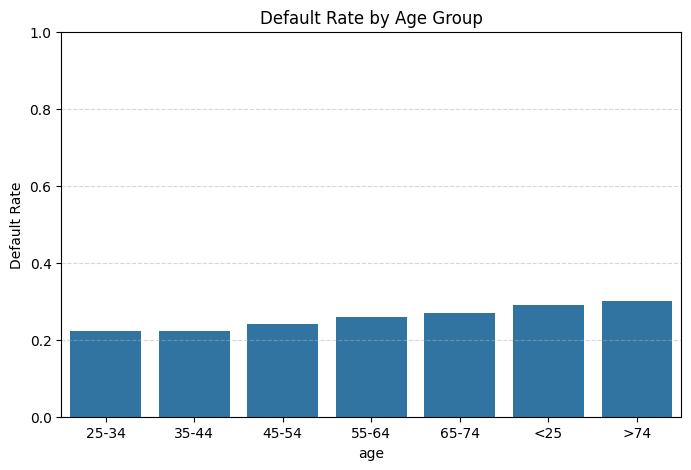

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÍµêÏ∞®ÌëúÎ°ú default ÎπÑÏú® Í≥ÑÏÇ∞
age_default_rate = pd.crosstab(Loan_Default_df['age'], Loan_Default_df['Status'], normalize='index')[1]

# ÏãúÎ¶¨Ï¶à ‚Üí DataFrame Î≥ÄÌôò
age_default_rate = age_default_rate.reset_index().rename(columns={1: 'default_rate'})

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.barplot(data=age_default_rate, x='age', y='default_rate', order=sorted(age_default_rate['age']))
plt.ylabel("Default Rate")
plt.title("Default Rate by Age Group")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 03 Data Pre-Procssing - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- (including Spliting Balanced Train/Test Dataset)


#### 03-01 Ï†ÑÏ≤òÎ¶¨ ÌÅ¥ÎûòÏä§ Ï†ïÏùò Î∞è Ï†ÅÏö©
- Ï†ÑÏ≤òÎ¶¨ ÌÅ¥ÎûòÏä§ Ï†ïÏùò?
  - Î∂àÌïÑÏöî Ïª¨Îüº ÏÇ≠Ï†ú
  - Í≤∞Ï∏°Ïπò ÎπÑÏú®, Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Îî∞Î•∏ Ï†ÑÏ≤òÎ¶¨ Î°úÏßÅ
    - Í≤∞Ï∏°Ïπò(1%)ÎØ∏Îßå, ÏàòÏπòÌòï -> Ï†úÍ±∞
    - Í≤∞Ï∏°Ïπò(1%)ÎØ∏Îßå, Î≤îÏ£ºÌòï -> Ï†úÍ±∞
    - Í≤∞Ï∏°Ïπò(1%)Ïù¥ÏÉÅ, ÏàòÏπòÌòï -> Ï§ëÍ∞ÑÍ∞í ÎòêÎäî skewnessÏã¨ÌïòÎ©¥ log1p Î≥ÄÌôò
    - Í≤∞Ï∏°Ïπò(1%)Ïù¥ÏÉÅ, Î≤îÏ£ºÌòï -> 'Unknown'Ïù¥ÎÇò 'Missing'ÏúºÎ°ú Ï≤òÎ¶¨

In [71]:
class DataPreprocessor:
  def __init__(self,target_var,delete_var=None, test_rate=0.2, random_state=42,
               missing_value_rate=0.01, skewness_abs_criterion=2, log_transform_cols=None,scaling_method=None):
    # class Ï†ïÏùòÌï† Îïå test_rate=0.2 Ï≤òÎüº Ï¥àÍ∏∞Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ï§òÏïºÌï®
    # Ïô∏Î∂ÄÏóêÏÑú Ï†ïÌïú Í∞íÏùÑ ÏßÅÏ†ë Ï∞∏Ï°∞ÌïòÎäî Íµ¨Ï°∞Í∞Ä ÏïÑÎãò
    self.target_var = target_var
    self.delete_var = delete_var if delete_var else []
    self.test_rate = test_rate
    self.random_state = random_state
    self.missing_value_rate = missing_value_rate
    self.skewness_abs_criterion = skewness_abs_criterion
    self.log_transform_cols = log_transform_cols if log_transform_cols is not None else []
    self.scaling_method = scaling_method.lower() if scaling_method else None

  def fit_transform(self, df):
    # fit_transformÏù¥ÎùºÎäî Îß§ÏÑúÎìú Ï†ïÏùò
    df = df.copy() # pandas warningÎ∞©ÏßÄ Ï∞®ÏõêÏóêÏÑú .copy()

    # 1. Drop delete_vars, Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
    df.drop(columns = self.delete_var, inplace = True, errors = 'ignore')

    # 2. Separate target
    y = df[self.target_var]  # ÏàòÏ†ïÎê®
    df.drop(columns=[self.target_var], inplace=True)  # ÏàòÏ†ïÎê®

    # 3. Column type ÎÇòÎàÑÍ∏∞(ÏàòÏπòÌòï, Î≤îÏ£ºÌòï)
    num_cols = df.select_dtypes(include = ['float64','int64']).columns
    cat_cols = df.select_dtypes(include = ['object']).columns

    # 4. log1p ÎåÄÏÉÅ ÏûêÎèô ÌåêÎã® (ÏóÜÏúºÎ©¥)
    if not self.log_transform_cols:
      skewed = df[num_cols].skew().abs()
      self.log_transform_cols = skewed[skewed > self.skewness_abs_criterion].index.tolist()

    # 5. Í≤∞Ï∏° ÎπÑÏú® Í∏∞Ï§Ä Ìñâ Ï†úÍ±∞
    missing_ratio = df.isnull().mean()
    cols_to_dropna = missing_ratio[missing_ratio < self.missing_value_rate].index.tolist()
    df.dropna(subset=cols_to_dropna, inplace=True)  # ÏàòÏ†ïÎê®
    y = y.loc[df.index]  # ÏàòÏ†ïÎê®: row ÏÇ≠Ï†ú ÌõÑ target Ïû¨Ï†ïÎ†¨

    # 6. ÎÇ®ÏùÄ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    for col in df.columns:
      if col in num_cols:
        if col in self.log_transform_cols:
          df[col] = df[col].clip(lower=0)  # ÏàòÏ†ïÎê®: ÏùåÏàò Î∞©ÏßÄ
          df[col] = np.log1p(df[col])
        df[col] = df[col].fillna(df[col].median())
      elif col in cat_cols:
        df[col] = df[col].fillna("Missing_value")

    # 7. Î≤îÏ£ºÌòï Î≥ÄÏàò One-Hot Ïù∏ÏΩîÎî©
    df_cat = pd.get_dummies(df[cat_cols], drop_first=True)
    df_num = df[num_cols]

    # 8. Scaling ÏÑ†ÌÉùÏ†Å
    if self.scaling_method:
      if self.scaling_method=='standard':
        scaler = StandardScaler()
      elif self.scaling_method=='min_max':
        scaler = MinMaxScaler()
      elif self.scaling_method=='robust':
        scaler = RobustScaler()
      else:
        raise ValueError("Unsupported scaling_method. Choose from 'standard', 'min_max', 'robust', or None.")

    # 9. ÌîºÏ≤ò Ï°∞Ìï©
    X = pd.concat([df_num, df_cat], axis=1) # yÎäî ÏïûÏóêÏÑú Ï†ïÏùòÌï®

    # üîß Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÏ†ú(xg-boost featureÎ¨∏Ï†ú Îïå)
    X.columns = clean_feature_names(X.columns)

    # 10. train-test split
    return train_test_split(X, y, test_size=self.test_rate,
                            random_state=self.random_state, stratify=y)


In [19]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2
)

In [20]:
X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

### 04 Informations Related Logistic Regression Definition + Train/Test
- Ï≤òÏùåÏóê ÏàòÎ†¥ÏùÑ ÏïàÌï¥ÏÑú scaling(standard) ÌñàÏùåÏóêÎèÑ ÏàòÎ†¥ ÏïàÌï®
- solverÎ•º Î≥ÄÍ≤ΩÌï®(lbfgs -> sagaÎ°ú)

#### 04-01 scalingÏùò ÏòÅÌñ• ÌôïÏù∏
- scaling ÎØ∏Ï†ÅÏö© Ïãú
  - max_iter = 3000ÍπåÏßÄ ÌñàÏùåÏóêÎèÑ ÏàòÎ†¥ÌïòÏßÄ ÏïäÎäîÎã§Îäî warningÏù¥ ÎÇòÏò¥
    - Îã§Ïãú Ïã§ÌñâÌï¥Î≥¥Î©¥ ÏïàÎÇòÏò¨ ÎïåÎèÑ ÏûàÏùå
  - ÏÑ±Îä•(ÏÜåÎ™®ÏãúÍ∞Ñ 82.7Ï¥à)
    - Accuracy : 0.8687
    - Precision : 0.8837
    - Recall : 0.5330
    - F1-score : 0.6653
- scaling Ï†ÅÏö© Ïãú(class ÏàòÏ†ïÌï®)
  - ÏÑ±Îä•ÏùÄ ÏúÑÏôÄ ÎèôÎì±(ÏÜåÎ™®ÏãúÍ∞Ñ 83.2Ï¥à -> Ïû¨Ïã§ÌñâÌïòÎãà 91Ï¥à)
- solver Î≥ÄÍ≤Ω
  - lbfgs ÎåÄÏã† 'saga'Î°ú solverÎ≥ÄÍ≤Ω
  - ÏÑ±Îä•(ÏÜåÎ™®ÏãúÍ∞Ñ 590Ï¥à)
    - Accuracy : 0.4902
    - Precision : 0.2408
    - Recall : 0.501
    - F1 score : 0.3203
- Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Î™©Ï†Å Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ
  - ÏÑ±Îä•(77.91Ï¥à)
    - Accuracy : 0.8713
    - Precision : 0.9188
    - Recall : 0.5212
    - F1 score : 0.6651

In [21]:
from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
import time

st = time.time()
num_iter= 3000 # 1000Î≤à ÌïòÎãà warningÎÇòÏò¥

lr_clf = LogisticRegression(max_iter = num_iter, n_jobs=-1)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

ed = time.time()

print(f'ÏÜåÎ™®ÏãúÍ∞Ñ : {round(ed-st,2)}Ï¥à')
print(f'number_of_iteration : {num_iter}')
print('\n')
print("Accuracy:", round(accuracy_score(y_test, lr_pred),4))
print("Precision:", round(precision_score(y_test, lr_pred),4))
print("Recall:", round(recall_score(y_test, lr_pred),4))
print("F1 Score:", round(f1_score(y_test, lr_pred),4))


ÏÜåÎ™®ÏãúÍ∞Ñ : 82.72Ï¥à
number_of_iteration : 3000


Accuracy: 0.8685
Precision: 0.8851
Recall: 0.533
F1 Score: 0.6653


##### standard-scaling Ï†ÅÏö©

In [26]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [27]:
from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
import time

st = time.time()
num_iter= 3000 # 1000Î≤à ÌïòÎãà warningÎÇòÏò¥

lr_clf = LogisticRegression(max_iter = num_iter, n_jobs=-1)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

ed = time.time()

print(f'ÏÜåÎ™®ÏãúÍ∞Ñ : {round(ed-st,2)}Ï¥à')
print(f'number_of_iteration : {num_iter}')
print('\n')
print("Accuracy:", round(accuracy_score(y_test, lr_pred),4))
print("Precision:", round(precision_score(y_test, lr_pred),4))
print("Recall:", round(recall_score(y_test, lr_pred),4))
print("F1 Score:", round(f1_score(y_test, lr_pred),4))

ÏÜåÎ™®ÏãúÍ∞Ñ : 91.22Ï¥à
number_of_iteration : 3000


Accuracy: 0.8685
Precision: 0.8851
Recall: 0.533
F1 Score: 0.6653


##### Î≥ÄÏàò Ï°∞Ï†ï
- 5Í∞ú Î≥ÄÏàò Ï†úÍ±∞(random-forest Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1Ïù¥ ÎÇòÏò¥)
  - Í∑∏Î†áÎã§Î©¥ Ï†Ä Î≥ÄÏàòÎäî 'Ï†ïÎãµÏùÑ ÏïåÍ≥† ÏûàÎäî' Î≥ÄÏàò Ïù¥ÎØÄÎ°ú data_leakageÏóê Ìï¥Îãπ

In [79]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year','credit_type_EQUI','Interest_rate_spread','Upfront_charges','Secured_by','Security_Type'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)
## Random-Forest ÏÑ±Îä•ÏßÄÌëúÍ∞Ä Î™®Îëê 1ÏùÑ Ï∞çÏñ¥ÏÑú Î≥ÄÏàò Ï°∞Ï†ï

## ÏïÑÎûò Î≥ÄÏàòÎì§ÏùÄ ÏÇ¨Ïã§ÏÉÅ Î™®ÌòïÏóê Ï†ïÎãµÏùÑ ÏïåÎ†§Ï£ºÎäî Î≥ÄÏàò(over-fittingÎ¨∏Ï†ú)
# credit_type_EQUI	targetÏù¥ 1Ïùº ÎïåÎßå Îì±Ïû•
# Interest_rate_spread	Í∞í ÌïòÎÇòÎ°ú Í±∞Ïùò Ïù¥ÏßÑ Î∂ÑÎ¶¨ Í∞ÄÎä•
# Upfront_charges	Ìù¨Í∑ÄÍ∞íÏóêÏÑú ÏôÑÏ†ÑÎ∂ÑÎ¶¨ Îã§Ïàò
# Secured_by	"land" ‚Üí Î™®Îëê Î∂àÎüâ (Status=1), Ïã¨Í∞ÅÌïú Í∑úÏπôÏÑ±
# Security_Type	"Indriect"Ïùº Í≤ΩÏö∞ Î™®Îëê default

# ÏúÑ Îã§ÏÑØ Î≥ÄÏàòÍ∞Ä Îã§ Îì§Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [80]:
from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
import time

st = time.time()
num_iter= 3000 # 1000Î≤à ÌïòÎãà warningÎÇòÏò¥

lr_clf_final = LogisticRegression(max_iter = num_iter, n_jobs=-1)
lr_clf_final.fit(X_train, y_train)
lr_pred_final = lr_clf_final.predict(X_test)

ed = time.time()

print(f'ÏÜåÎ™®ÏãúÍ∞Ñ : {round(ed-st,2)}Ï¥à')
print(f'number_of_iteration : {num_iter}')
print('\n')
print("Accuracy:", round(accuracy_score(y_test, lr_pred_final),4))
print("Precision:", round(precision_score(y_test, lr_pred_final),4))
print("Recall:", round(recall_score(y_test, lr_pred_final),4))
print("F1 Score:", round(f1_score(y_test, lr_pred_final),4))

ÏÜåÎ™®ÏãúÍ∞Ñ : 77.91Ï¥à
number_of_iteration : 3000


Accuracy: 0.8713
Precision: 0.9188
Recall: 0.5212
F1 Score: 0.6651


#### 04-02 solver Î≥ÄÍ≤Ω(ÎπÑÏ∂îÏ≤ú)
- Î°úÏßÄÏä§Ìã±Ïùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Î©¥ lbfgs ÎåÄÏã† 'saga'Î°ú solver Î≥ÄÍ≤Ω(gpt-plusÏùò Ï∂îÏ≤ú)
- ÎèÑÎ¶¨Ïñ¥ solver Î≥ÄÍ≤ΩÌïòÎãà Îçî Ïò§Îûò Í±∏Î¶¨Îäî Í≤É Í∞ôÏùå

In [39]:
# prep = DataPreprocessor(
#     target_var='Status',
#     delete_var=['ID', 'year'],
#     test_rate=0.2,
#     random_state=42,
#     missing_value_rate=0.01,
#     skewness_abs_criterion=2,
#     scaling_method = 'standard'
# )

# X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [40]:
# from sklearn.linear_model import LogisticRegression # Î°úÏßÄÏä§Ìã± Î™®Ìòï Î∂àÎü¨Ïò§Í∏∞
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Î™®Îç∏ ÌèâÍ∞ÄÏßÄÌëú(accuracy, precision, recall, f1_score)
# import time

# st = time.time()
# num_iter=5000 # 1000Î≤à ÌïòÎãà warningÎÇòÏò¥

# # solver Î≥ÄÍ≤Ω(lbfgs -> saga)
# # class_weight(balancedÎ°ú)
# # penalty Ìï®Ïàò Ï†ÅÏö©(l2)
# # n_jobs=-1 Î™®Îì† ÏΩîÏñ¥Î•º ÏÇ¨Ïö©
# lr_clf = LogisticRegression(solver='saga',max_iter = num_iter,
#                             class_weight='balanced',penalty='l2',n_jobs=-1)
# lr_clf.fit(X_train, y_train)
# lr_pred = lr_clf.predict(X_test)

# ed = time.time()

# print(f'ÏÜåÎ™®ÏãúÍ∞Ñ : {round(ed-st,2)}Ï¥à')
# print(f'number_of_iteration : {num_iter}')
# print('\n')
# print("Accuracy:", round(accuracy_score(y_test, lr_pred),4))
# print("Precision:", round(precision_score(y_test, lr_pred),4))
# print("Recall:", round(recall_score(y_test, lr_pred),4))
# print("F1 Score:", round(f1_score(y_test, lr_pred),4))

### 05 Îã§Î•∏ Î™®Îç∏Îì§ ÏãúÌóò?
- random-forest(17.02Ï¥à)
  - Accuracy: 0.934
  - Precision: 0.8917
  - Recall: 0.8321
  - F1 Score: 0.8609
- xgboost(8.57Ï¥à)
    - Accuracy : 0.9361
    - Precision : 0.8736
    - Recall : 0.8648
    - F1-score : 0.8692
- lightgbm(2.07Ï¥à)
    - Accuracy : 0.9373
    - Precision : 0.8706
    - Recall : 0.8745
    - F1-score : 0.8725

#### 05-01 Random Forest

In [75]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year','credit_type_EQUI','Interest_rate_spread','Upfront_charges','Secured_by','Security_Type'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)
## Random-Forest ÏÑ±Îä•ÏßÄÌëúÍ∞Ä Î™®Îëê 1ÏùÑ Ï∞çÏñ¥ÏÑú Î≥ÄÏàò Ï°∞Ï†ï

## ÏïÑÎûò Î≥ÄÏàòÎì§ÏùÄ ÏÇ¨Ïã§ÏÉÅ Î™®ÌòïÏóê Ï†ïÎãµÏùÑ ÏïåÎ†§Ï£ºÎäî Î≥ÄÏàò(over-fittingÎ¨∏Ï†ú)
# credit_type_EQUI	targetÏù¥ 1Ïùº ÎïåÎßå Îì±Ïû•
# Interest_rate_spread	Í∞í ÌïòÎÇòÎ°ú Í±∞Ïùò Ïù¥ÏßÑ Î∂ÑÎ¶¨ Í∞ÄÎä•
# Upfront_charges	Ìù¨Í∑ÄÍ∞íÏóêÏÑú ÏôÑÏ†ÑÎ∂ÑÎ¶¨ Îã§Ïàò
# Secured_by	"land" ‚Üí Î™®Îëê Î∂àÎüâ (Status=1), Ïã¨Í∞ÅÌïú Í∑úÏπôÏÑ±
# Security_Type	"Indriect"Ïùº Í≤ΩÏö∞ Î™®Îëê default

# ÏúÑ Îã§ÏÑØ Î≥ÄÏàòÍ∞Ä Îã§ Îì§Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# 1. Î™®Îç∏ Ï†ïÏùò
rf_clf = RandomForestClassifier(random_state=42)

# 2. ÌïôÏäµ
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()

# 3. ÏòàÏ∏°
rf_pred = rf_clf.predict(X_test)

# 4. ÌèâÍ∞Ä
print(f"\n‚úÖ [Random Forest]")
print(f"ÏÜåÎ™®ÏãúÍ∞Ñ : {round(end - start, 2)}Ï¥à")
print("Accuracy:", round(accuracy_score(y_test, rf_pred), 4))
print("Precision:", round(precision_score(y_test, rf_pred), 4))
print("Recall:", round(recall_score(y_test, rf_pred), 4))
print("F1 Score:", round(f1_score(y_test, rf_pred), 4))


‚úÖ [Random Forest]
ÏÜåÎ™®ÏãúÍ∞Ñ : 17.02Ï¥à
Accuracy: 0.934
Precision: 0.8917
Recall: 0.8321
F1 Score: 0.8609


#### 05-02 XG-boost

In [72]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year','credit_type_EQUI','Interest_rate_spread','Upfront_charges','Secured_by','Security_Type'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)
## Random-Forest ÏÑ±Îä•ÏßÄÌëúÍ∞Ä Î™®Îëê 1ÏùÑ Ï∞çÏñ¥ÏÑú Î≥ÄÏàò Ï°∞Ï†ï

## ÏïÑÎûò Î≥ÄÏàòÎì§ÏùÄ ÏÇ¨Ïã§ÏÉÅ Î™®ÌòïÏóê Ï†ïÎãµÏùÑ ÏïåÎ†§Ï£ºÎäî Î≥ÄÏàò(over-fittingÎ¨∏Ï†ú)
# credit_type_EQUI	targetÏù¥ 1Ïùº ÎïåÎßå Îì±Ïû•
# Interest_rate_spread	Í∞í ÌïòÎÇòÎ°ú Í±∞Ïùò Ïù¥ÏßÑ Î∂ÑÎ¶¨ Í∞ÄÎä•
# Upfront_charges	Ìù¨Í∑ÄÍ∞íÏóêÏÑú ÏôÑÏ†ÑÎ∂ÑÎ¶¨ Îã§Ïàò
# Secured_by	"land" ‚Üí Î™®Îëê Î∂àÎüâ (Status=1), Ïã¨Í∞ÅÌïú Í∑úÏπôÏÑ±
# Security_Type	"Indriect"Ïùº Í≤ΩÏö∞ Î™®Îëê default

# ÏúÑ Îã§ÏÑØ Î≥ÄÏàòÍ∞Ä Îã§ Îì§Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [73]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')  # eval_metric Íº≠ ÏÑ§Ï†ï

start = time.time()
xgb_clf.fit(X_train, y_train)
end = time.time()

xgb_pred = xgb_clf.predict(X_test)

print(f"\n [XGBoost]")
print(f"ÏÜåÎ™®ÏãúÍ∞Ñ : {round(end - start, 2)}Ï¥à")
print("Accuracy:", round(accuracy_score(y_test, xgb_pred), 4))
print("Precision:", round(precision_score(y_test, xgb_pred), 4))
print("Recall:", round(recall_score(y_test, xgb_pred), 4))
print("F1 Score:", round(f1_score(y_test, xgb_pred), 4))


 [XGBoost]
ÏÜåÎ™®ÏãúÍ∞Ñ : 8.57Ï¥à
Accuracy: 0.9361
Precision: 0.8736
Recall: 0.8648
F1 Score: 0.8692


#### 05-03 lightGBM

In [77]:
prep = DataPreprocessor(
    target_var='Status',
    delete_var=['ID', 'year','credit_type_EQUI','Interest_rate_spread','Upfront_charges','Secured_by','Security_Type'],
    test_rate=0.2,
    random_state=42,
    missing_value_rate=0.01,
    skewness_abs_criterion=2,
    scaling_method = 'standard'
)
## Random-Forest ÏÑ±Îä•ÏßÄÌëúÍ∞Ä Î™®Îëê 1ÏùÑ Ï∞çÏñ¥ÏÑú Î≥ÄÏàò Ï°∞Ï†ï

## ÏïÑÎûò Î≥ÄÏàòÎì§ÏùÄ ÏÇ¨Ïã§ÏÉÅ Î™®ÌòïÏóê Ï†ïÎãµÏùÑ ÏïåÎ†§Ï£ºÎäî Î≥ÄÏàò(over-fittingÎ¨∏Ï†ú)
# credit_type_EQUI	targetÏù¥ 1Ïùº ÎïåÎßå Îì±Ïû•
# Interest_rate_spread	Í∞í ÌïòÎÇòÎ°ú Í±∞Ïùò Ïù¥ÏßÑ Î∂ÑÎ¶¨ Í∞ÄÎä•
# Upfront_charges	Ìù¨Í∑ÄÍ∞íÏóêÏÑú ÏôÑÏ†ÑÎ∂ÑÎ¶¨ Îã§Ïàò
# Secured_by	"land" ‚Üí Î™®Îëê Î∂àÎüâ (Status=1), Ïã¨Í∞ÅÌïú Í∑úÏπôÏÑ±
# Security_Type	"Indriect"Ïùº Í≤ΩÏö∞ Î™®Îëê default

# ÏúÑ Îã§ÏÑØ Î≥ÄÏàòÍ∞Ä Îã§ Îì§Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Î™®Îì† ÏÑ±Îä•ÏßÄÌëúÍ∞Ä 1ÏùÑ Ï∞çÏùå

X_train, X_test, y_train, y_test = prep.fit_transform(Loan_Default_df)

In [78]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=42)

start = time.time()
lgbm_clf.fit(X_train, y_train)
end = time.time()

lgbm_pred = lgbm_clf.predict(X_test)

print(f"\n [LightGBM]")
print(f"ÏÜåÎ™®ÏãúÍ∞Ñ : {round(end - start, 2)}Ï¥à")
print("Accuracy:", round(accuracy_score(y_test, lgbm_pred), 4))
print("Precision:", round(precision_score(y_test, lgbm_pred), 4))
print("Recall:", round(recall_score(y_test, lgbm_pred), 4))
print("F1 Score:", round(f1_score(y_test, lgbm_pred), 4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28899, number of negative: 88920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 117819, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245283 -> initscore=-1.123930
[LightGBM] [Info] Start training from score -1.123930

 [LightGBM]
ÏÜåÎ™®ÏãúÍ∞Ñ : 2.07Ï¥à
Accuracy: 0.9373
Precision: 0.8706
Recall: 0.8745
F1 Score: 0.8725


### 06 ÏãúÍ∞ÅÌôî ROC_AUC curve

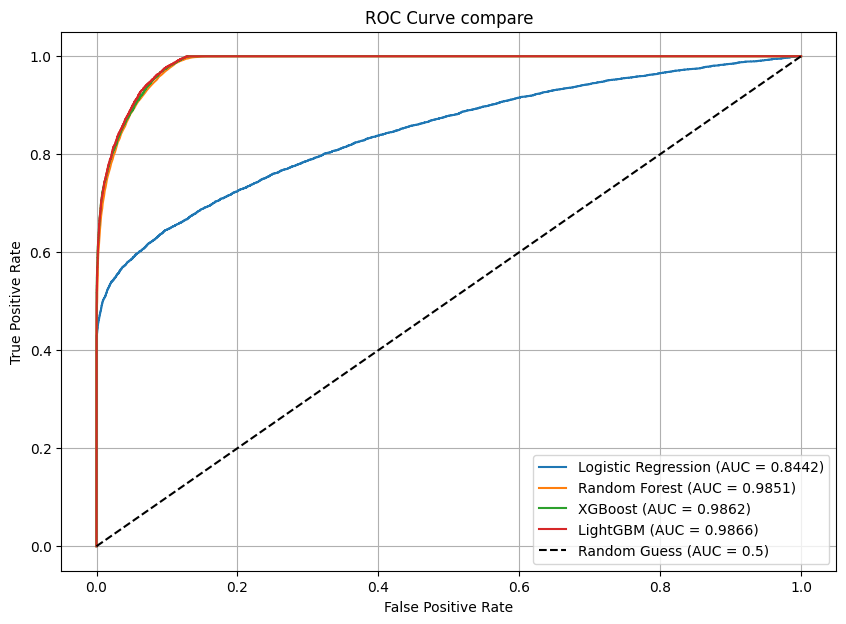

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Î™®Îç∏Î™ÖÍ≥º Î™®Îç∏ Í∞ùÏ≤¥ ÎîïÏÖîÎÑàÎ¶¨
models = {
    'Logistic Regression': lr_clf_final,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'LightGBM': lgbm_clf
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # predict_probaÏùò positive class ÌôïÎ•†Îßå Ï∂îÏ∂ú (1Î≤àÏß∏ Ïª¨Îüº)
    y_probs = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

# Random guess ÏÑ†
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('ROC Curve compare')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()